In [30]:
import numpy as np
from matplotlib import pyplot as plt
import glob
import re

In [43]:
def get_proc_num(filename):
    match = re.search(r'proc(\d+)\.txt', filename)
    return int(match.group(1)) if match else None

def get_proc_num_center(filename):
    match = re.search(r'center_proc(\d+)\.txt', filename)
    return int(match.group(1)) if match else None

file_pattern = 'proc*.txt'
files = glob.glob(file_pattern)
files.sort(key=get_proc_num)

data = []

for file in files:
    with open(file, 'r') as f:
        x_coords = np.array([float(x) for x in f.readline().split()])
        y_coords = np.array([float(y) for y in f.readline().split()])
        data.append((x_coords, y_coords))

file_pattern = 'center_proc*.txt'
files = glob.glob(file_pattern)
files.sort(key=get_proc_num_center)

centers = []

for file in files:
    with open(file, 'r') as f:
        x_coords = np.array([float(x) for x in f.readline().split()])
        y_coords = np.array([float(y) for y in f.readline().split()])
        centers.append((x_coords, y_coords))

with open('center.txt', 'r') as f:
    center_x = float(f.readline().strip())
    center_y = float(f.readline().strip())

/tmp/ipykernel_64814/1121218958.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(data))


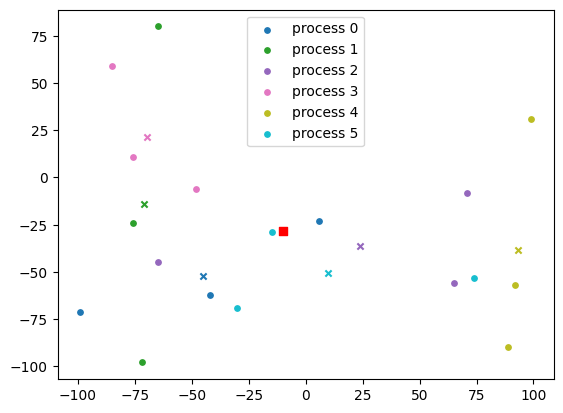

In [44]:
colors = plt.cm.get_cmap('tab10', len(data))

for i, (x, y) in enumerate(data):
    plt.scatter(x, y, color=colors(i), label=f'process {i}', s=15, marker='o')

for i, (x, y) in enumerate(centers):
    plt.scatter(x, y, color=colors(i), s=20, marker='x')

plt.scatter(center_x, center_y, color='red', marker='s')

plt.legend()